---

<h1>Thí Nghiệm</h1>

---

| Thông số ảnh hưởng |
|----------|
| Kích Thước Quần Thể|

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from Genetic_Algorithm import * 

In [5]:
test_weights = "4, 2, 5, 9, 10, 14, 16, 18, 13, 19, 4, 1"
test_values = "2, 4, 6, 9, 7, 11, 12, 4, 8, 10, 2, 8"
test_max_capacity = 13
items, max_capacity = parse_items(test_weights, test_values), test_max_capacity

In [7]:
population_sizes = [50, 100, 200, 500]
experiment_results = {}

for pop_size in population_sizes:
    print(f"\nThử nghiệm với kích thước quần thể: {pop_size}")
    
    # Lưu giá trị POPULATION_SIZE hiện tại
    original_pop_size = POPULATION_SIZE
    
    # Thay đổi POPULATION_SIZE
    globals()['POPULATION_SIZE'] = pop_size
    
    # Thực hiện thuật toán
    best_solution, best_fitness = genetic_algorithm()
    
    # Lưu kết quả
    experiment_results[pop_size] = {
        'best_solution': best_solution,
        'best_fitness': best_fitness,
        'fitness_history': fitness_history.copy()
    }
    
    print(f"Best Solution: {best_solution}")
    print(f"Best Fitness: {best_fitness}")
    print(f"Fitness History: {fitness_history}")
    
    # Reset fitness_history cho lần chạy tiếp theo
    fitness_history.clear()
    
    # Khôi phục giá trị POPULATION_SIZE
    globals()['POPULATION_SIZE'] = original_pop_size



Thử nghiệm với kích thước quần thể: 50
Best Solution: [0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0]
Best Fitness: 0
Fitness History: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Thử nghiệm với kích thước quần thể: 100
Best Solution: [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
Best Fitness: 0
Fitness History: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

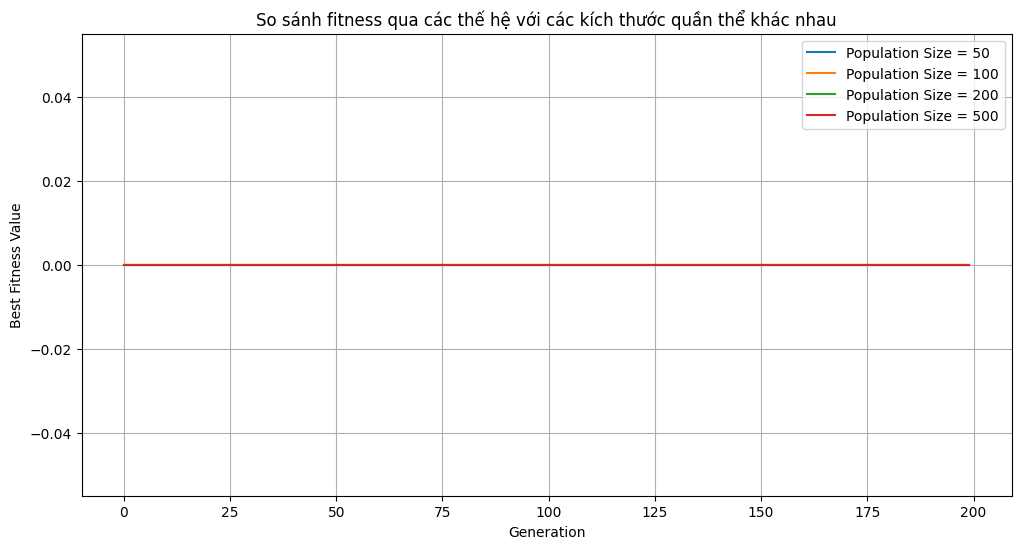

In [4]:
plt.figure(figsize=(12, 6))
for pop_size in population_sizes:
    plt.plot(experiment_results[pop_size]['fitness_history'], 
             label=f'Population Size = {pop_size}')

plt.xlabel('Generation')
plt.ylabel('Best Fitness Value')
plt.title('So sánh fitness qua các thế hệ với các kích thước quần thể khác nhau')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
# Hiển thị bảng kết quả chi tiết
print("\nKết quả chi tiết:")
print("-" * 60)
print(f"{'Population Size':^15} | {'Best Fitness':^15} | {'Convergence Speed':^20}")
print("-" * 60)

for pop_size in population_sizes:
    history = experiment_results[pop_size]['fitness_history']
    final_fitness = history[-1]
    
    # Tính tốc độ hội tụ (số thế hệ để đạt 95% fitness cuối cùng)
    convergence_gen = next(
        (i for i, x in enumerate(history) if x >= 0.95 * final_fitness), 
        len(history)
    )
    
    print(f"{pop_size:^15} | {final_fitness:^15.2f} | {convergence_gen:^20}")

print("-" * 60)


Kết quả chi tiết:
------------------------------------------------------------
Population Size |  Best Fitness   |  Convergence Speed  
------------------------------------------------------------
      50        |      0.00       |          0          
      100       |      0.00       |          0          
      200       |      0.00       |          0          
      500       |      0.00       |          0          
------------------------------------------------------------


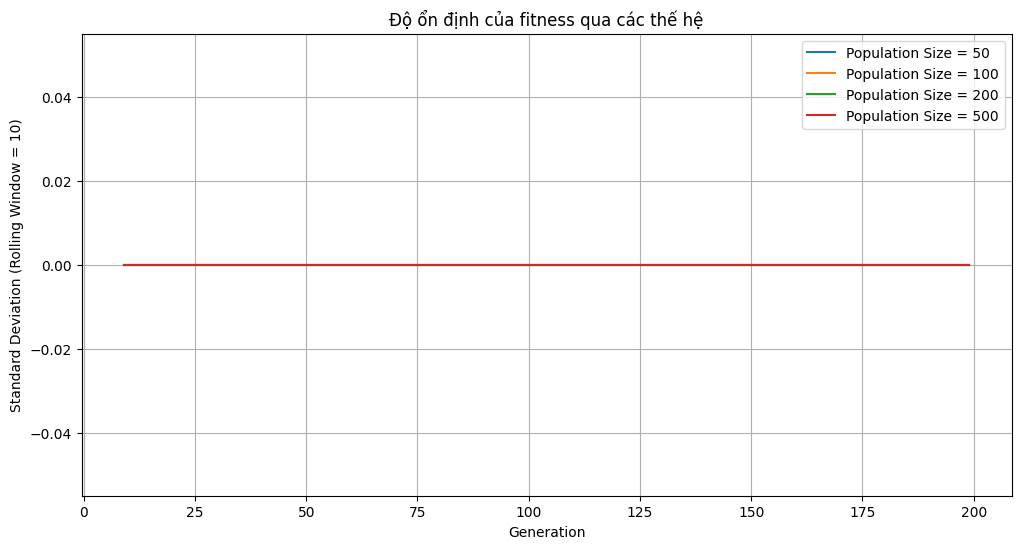

In [45]:
# Phân tích thêm về tính ổn định
plt.figure(figsize=(12, 6))
for pop_size in population_sizes:
    history = experiment_results[pop_size]['fitness_history']
    # Tính độ dao động của fitness
    rolling_std = pd.Series(history).rolling(window=10).std()
    plt.plot(rolling_std, label=f'Population Size = {pop_size}')

plt.xlabel('Generation')
plt.ylabel('Standard Deviation (Rolling Window = 10)')
plt.title('Độ ổn định của fitness qua các thế hệ')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
# Tổng kết và nhận xét
print("\nNhận xét về ảnh hưởng của kích thước quần thể:")
for pop_size in population_sizes:
    history = experiment_results[pop_size]['fitness_history']
    final_fitness = history[-1]
    
    print(f"\nKích thước quần thể {pop_size}:")
    print(f"- Fitness cuối cùng: {final_fitness}")
    print(f"- Tốc độ hội tụ: {next((i for i, x in enumerate(history) if x >= 0.95 * final_fitness), len(history))} thế hệ")
    print(f"- Độ ổn định (std): {np.std(history):.2f}")


Nhận xét về ảnh hưởng của kích thước quần thể:

Kích thước quần thể 50:
- Fitness cuối cùng: 0
- Tốc độ hội tụ: 0 thế hệ
- Độ ổn định (std): 0.00

Kích thước quần thể 100:
- Fitness cuối cùng: 0
- Tốc độ hội tụ: 0 thế hệ
- Độ ổn định (std): 0.00

Kích thước quần thể 200:
- Fitness cuối cùng: 0
- Tốc độ hội tụ: 0 thế hệ
- Độ ổn định (std): 0.00

Kích thước quần thể 500:
- Fitness cuối cùng: 0
- Tốc độ hội tụ: 0 thế hệ
- Độ ổn định (std): 0.00
